In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
%matplotlib inline

In [2]:
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

training_data = pd.read_csv('C:/Users/Prateek/OneDrive/Documents/test.csv')
testing_data = pd.read_csv('C:/Users/Prateek/OneDrive/Documents/train.csv')
print("Training Data: {}".format(training_data.shape))
print("Null values present in training data: {}".format(training_data.isnull().values.any()))
print("Testing Data: {}".format(testing_data.shape))
print("Null values present in testing data: {}".format(testing_data.isnull().values.any()))

In [8]:
y_train = training_data['Activity']
X_train = training_data.drop(columns = ['Activity', 'subject'])
y_test = testing_data['Activity']
X_test = testing_data.drop(columns = ['Activity', 'subject'])

([<matplotlib.patches.Wedge at 0x2dcd1dbd1c0>,
 [Text(0.9246289077905214, 0.5958702735311667, 'LAYING'),
  Text(-0.15485784087840757, 1.089045017030278, 'SITTING'),
  Text(-1.0393322592014753, 0.3602616479493165, 'STANDING'),
  Text(-0.8280699520170185, -0.7240857370274139, 'WALKING'),
  Text(0.18960134430378683, -1.0835364923426423, 'WALKING_DOWNSTAIRS'),
  Text(0.9915739703260872, -0.4762153518858462, 'WALKING_UPSTAIRS')],
 [Text(0.5043430406130116, 0.3250201491988182, '18.22'),
  Text(-0.08446791320640411, 0.5940245547437878, '18.05'),
  Text(-0.5669085050189865, 0.1965063534268999, '16.83'),
  Text(-0.45167451928201, -0.3949558565604075, '16.66'),
  Text(0.10341891507479281, -0.5910199049141684, '15.98'),
  Text(0.5408585292687748, -0.2597538283013706, '14.25')])

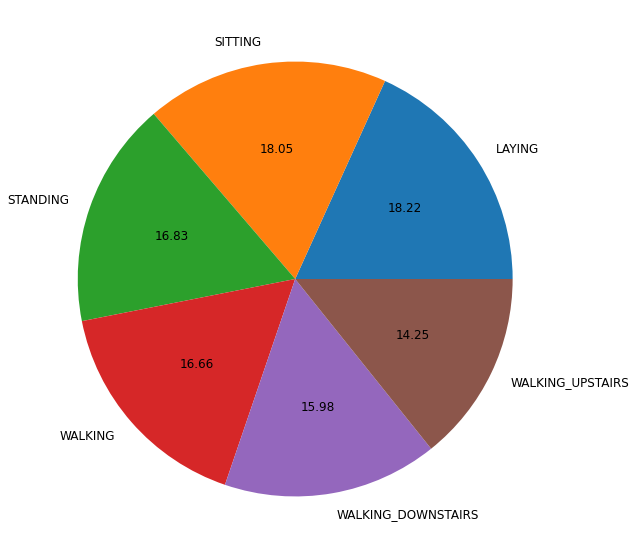

In [18]:
count_of_each_activity = np.array(y_train.value_counts())
activities = sorted(y_train.unique())
plt.rcParams.update({'figure.figsize': [10, 10], 'font.size': 12})
plt.pie(count_of_each_activity, labels = activities, autopct = '%0.2f')

<BarContainer object of 3 artists>

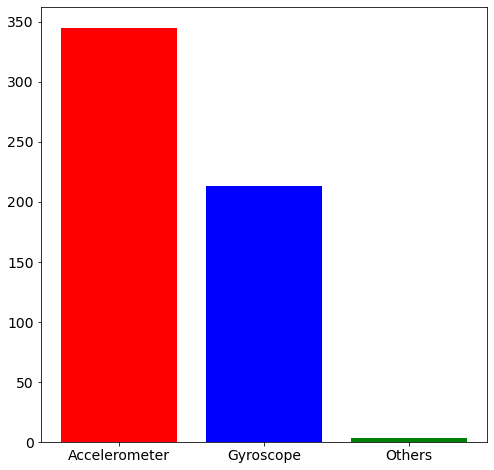

In [21]:
acc = 0
gyro = 0
others = 0
for column in X_train.columns:
    if 'Acc' in str(column):
        acc += 1
    elif 'Gyro' in str(column):
        gyro += 1
    else:
        others += 1
plt.rcParams.update({'figure.figsize': [8, 8], 'font.size': 14})
plt.bar(['Accelerometer', 'Gyroscope', 'Others'], [acc, gyro, others], color = ('r', 'b', 'g'))

In [11]:
standing_activity = training_data[training_data['Activity'] == 'STANDING']
standing_activity = standing_activity.reset_index(drop=True)

In [12]:
time = 1
index = 0
time_series = np.zeros(standing_activity.shape[0])
for row_number in range(standing_activity.shape[0]):
    if (row_number == 0 
        or standing_activity.iloc[row_number]['subject'] == standing_activity.iloc[row_number - 1]['subject']):
        time_series[index] = time
        time += 1
    else:
        time_series[index] = 1
        time = 2
    index += 1
time_series_df = pd.DataFrame({ 'Time': time_series })
standing_activity_df = pd.concat([standing_activity, time_series_df], axis = 1)

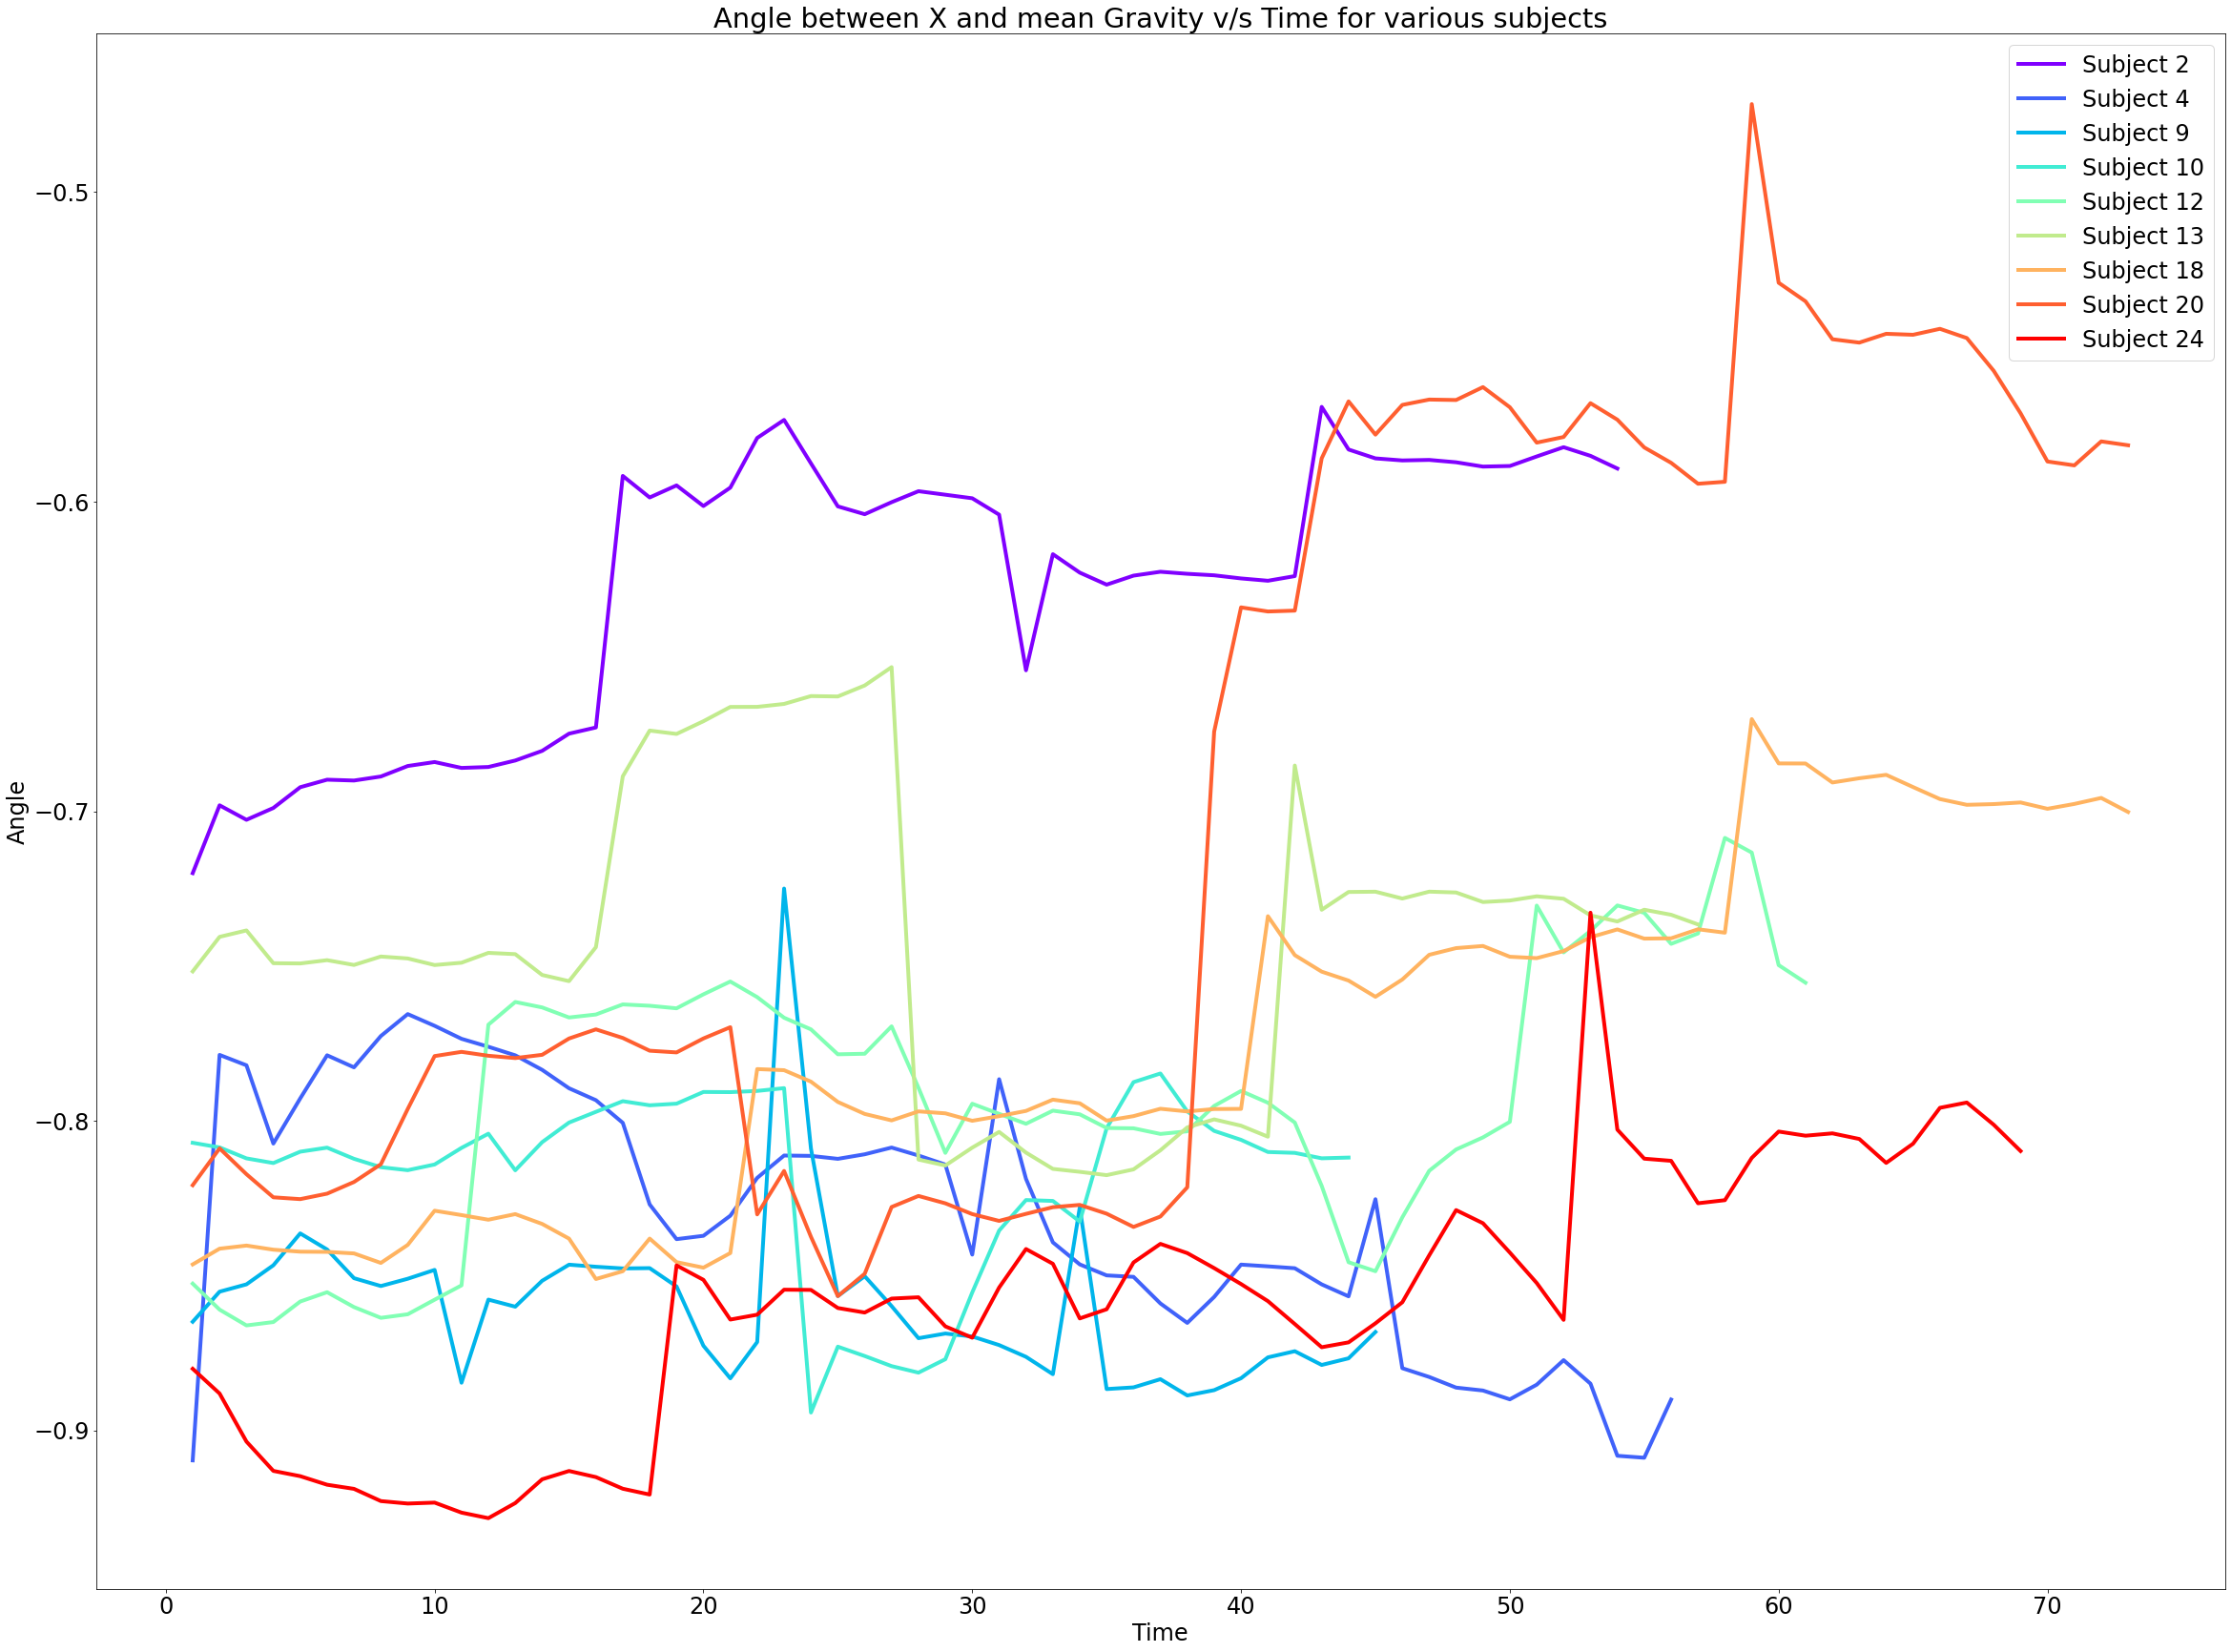

In [13]:
colors = cm.rainbow(np.linspace(0, 1, len(standing_activity_df['subject'].unique())))
id = 0
for subject in standing_activity_df['subject'].unique():
    plt.rcParams.update({'figure.figsize': [40, 30], 'font.size': 24})
    plt.plot(standing_activity_df[standing_activity_df['subject'] == subject]['Time'], 
             standing_activity_df[standing_activity_df['subject'] == subject]['angle(X,gravityMean)'],
             c = colors[id], 
             label = 'Subject ' + str(subject),
             linewidth = 4)
    plt.xlabel('Time')
    plt.ylabel('Angle')
    plt.title('Angle between X and mean Gravity v/s Time for various subjects')
    plt.legend(prop = {'size': 24})
    id += 1

In [15]:
accuracy_scores = np.zeros(4)

In [16]:
clf = SVC().fit(X_train, y_train)
prediction = clf.predict(X_test)
accuracy_scores[0] = accuracy_score(y_test, prediction)*100
print('Support Vector Classifier accuracy: {}%'.format(accuracy_scores[0]))
clf = LogisticRegression().fit(X_train, y_train)
prediction = clf.predict(X_test)
accuracy_scores[1] = accuracy_score(y_test, prediction)*100
print('Logistic Regression accuracy: {}%'.format(accuracy_scores[1]))
clf = KNeighborsClassifier().fit(X_train, y_train)
prediction = clf.predict(X_test)
accuracy_scores[2] = accuracy_score(y_test, prediction)*100
print('K Nearest Neighbors Classifier accuracy: {}%'.format(accuracy_scores[2]))
clf = RandomForestClassifier().fit(X_train, y_train)
prediction = clf.predict(X_test)
accuracy_scores[3] = accuracy_score(y_test, prediction)*100
print('Random Forest Classifier accuracy: {}%'.format(accuracy_scores[3]))

Support Vector Classifier accuracy: 91.56692056583242%


C:\Users\Prateek\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression accuracy: 93.4031556039173%
K Nearest Neighbors Classifier accuracy: 87.6088139281828%
Random Forest Classifier accuracy: 91.32208922742112%


Text(0.5, 1.0, 'Accuracy of various algorithms')

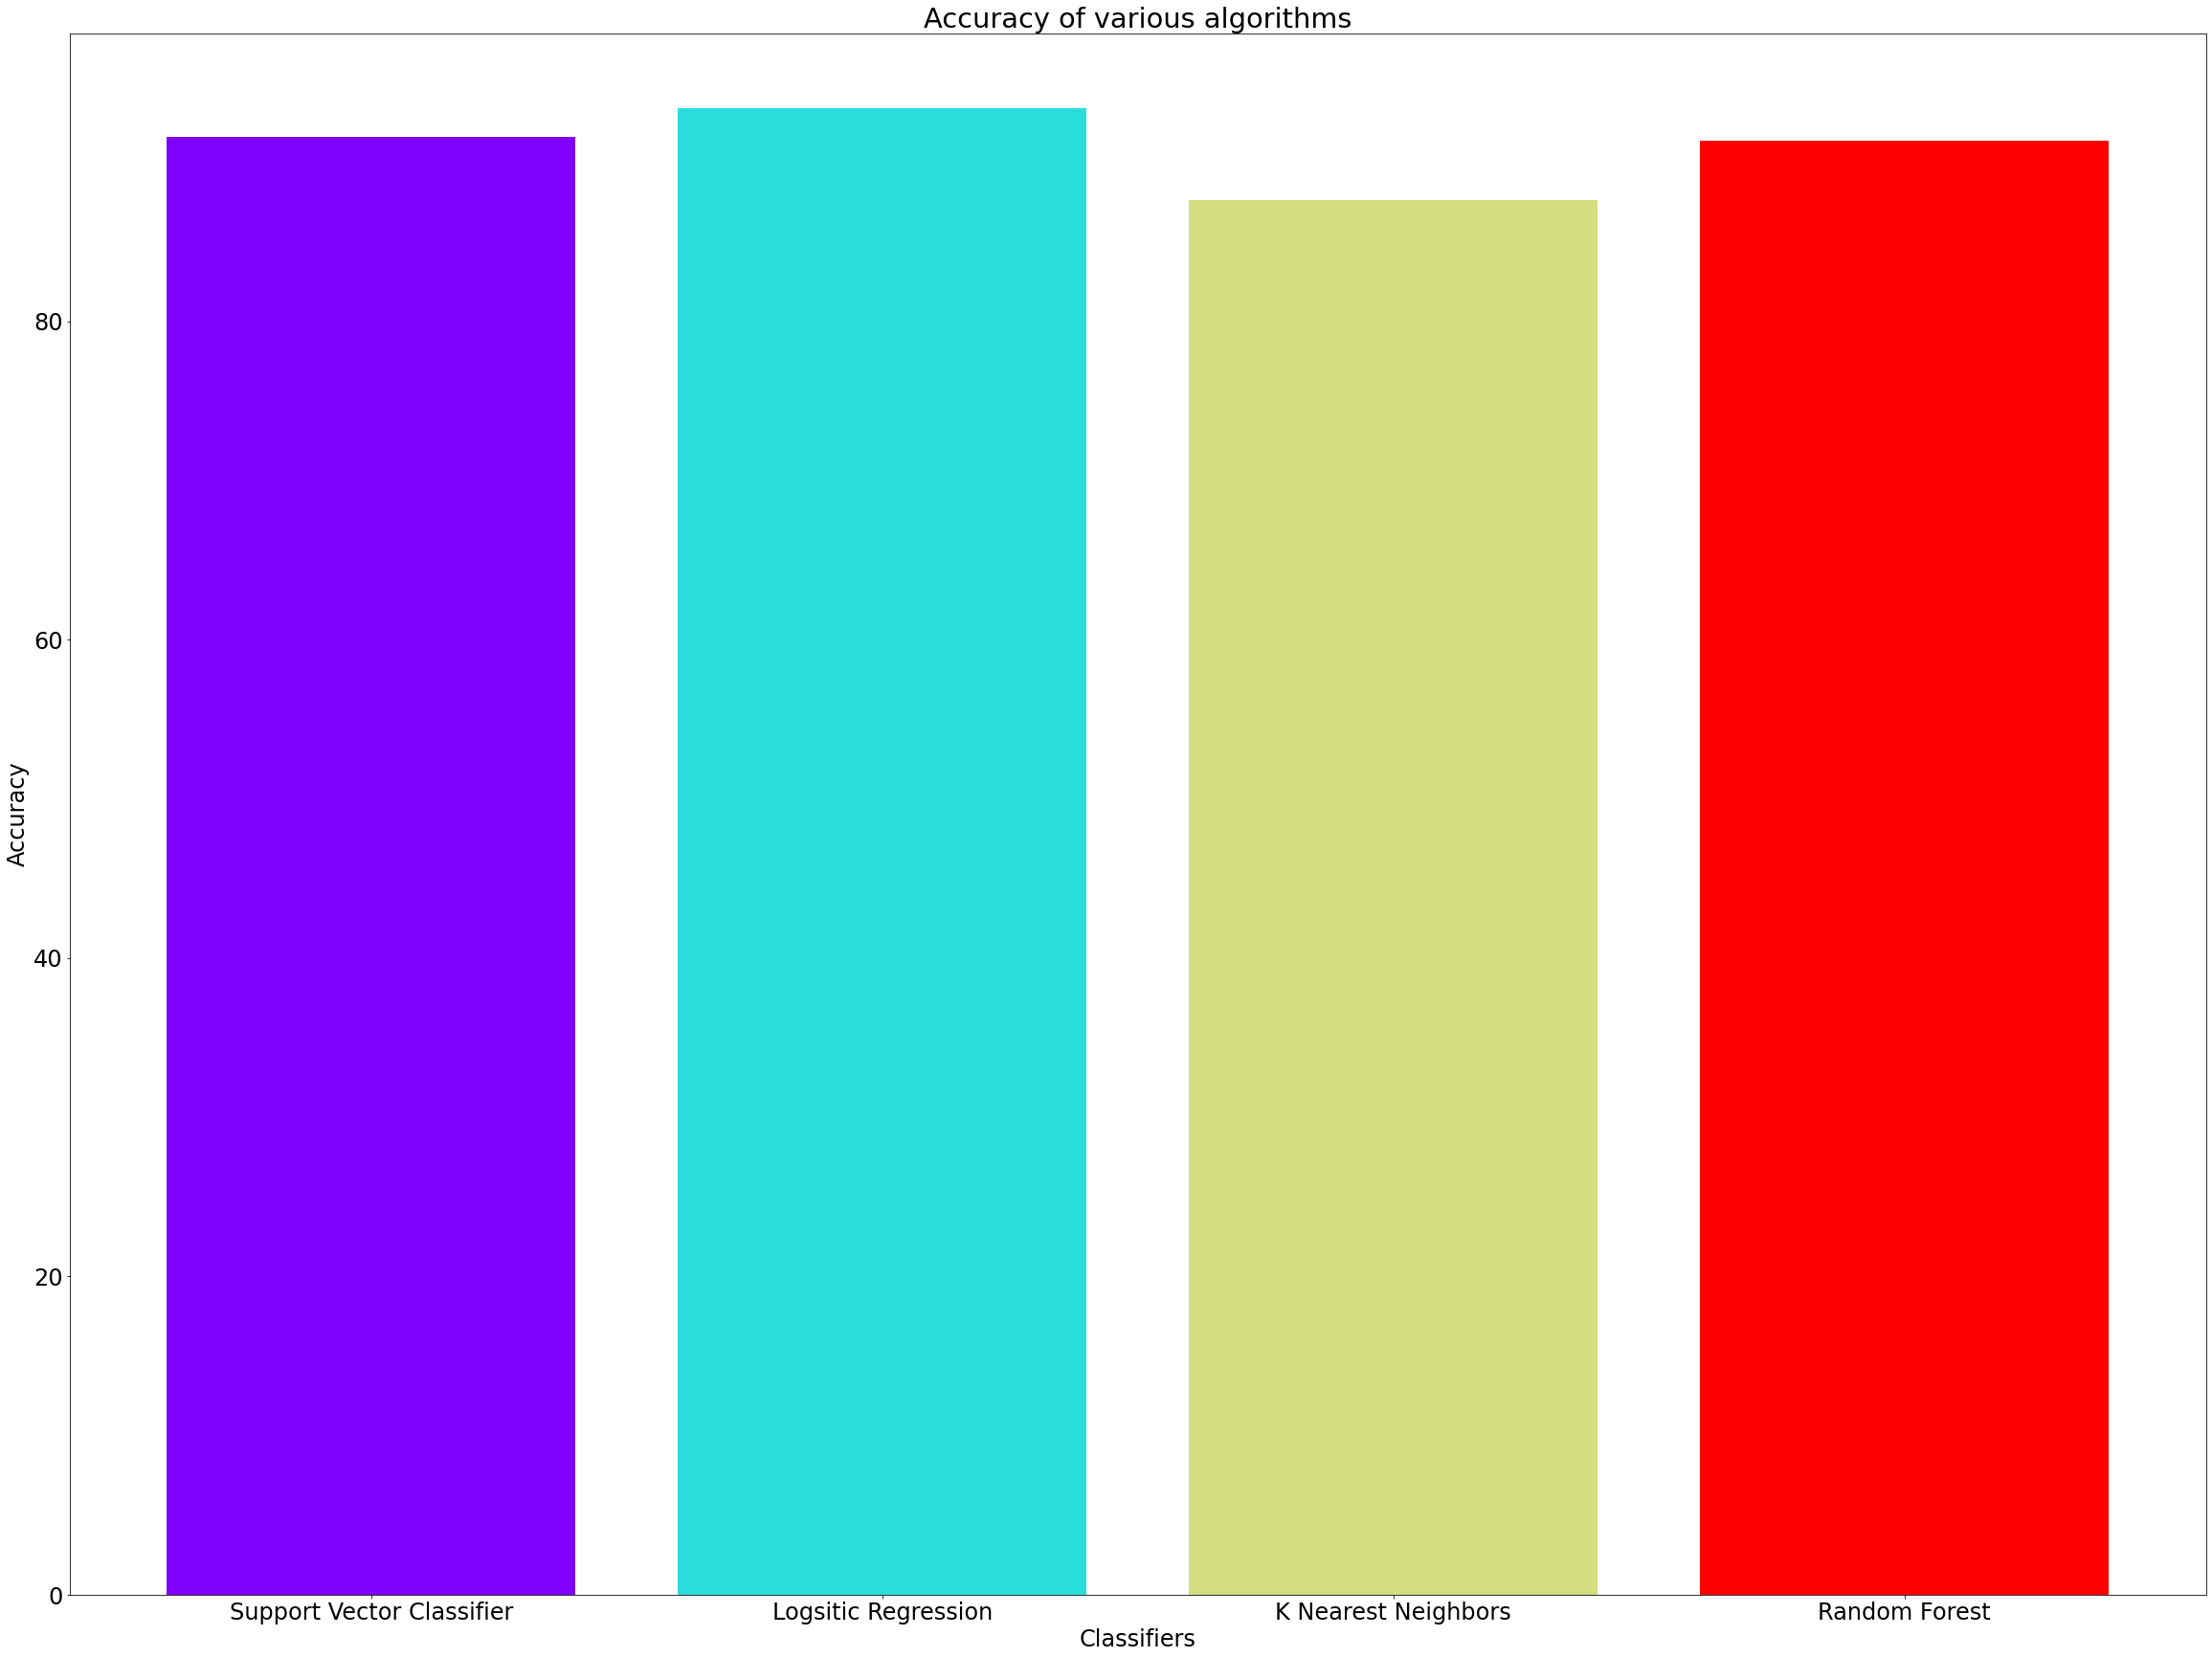

In [17]:
colors = cm.rainbow(np.linspace(0, 1, 4))
labels = ['Support Vector Classifier', 'Logsitic Regression', 'K Nearest Neighbors', 'Random Forest']
plt.bar(labels,
        accuracy_scores,
        color = colors)
plt.xlabel('Classifiers')
plt.ylabel('Accuracy')
plt.title('Accuracy of various algorithms')